In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = pd.read_excel('Bank_Churn_Messy.xlsx')  ###reading in the data into jupyter notebook

In [6]:
Customer_df = pd.read_excel("Bank_Churn_Messy.xlsx", sheet_name="Customer_Info")  ##reading in the different sheets in the workbook
Account_df = pd.read_excel("Bank_Churn_Messy.xlsx", sheet_name="Account_Info")  ##reading in the different sheets in the workbook

In [7]:
merged_df = pd.merge(Customer_df, Account_df , on = "CustomerId", how = "outer")  #to merge the sheets using the CustomerId

In [8]:
merged_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15565701,Ferri,698,Spain,Female,39.0,9,€90212.38,€161993.89,1,No,9,No,0
1,15565706,Akobundu,612,Spain,Male,35.0,1,€83256.26,€0.0,1,Yes,1,Yes,1
2,15565714,Cattaneo,601,France,Male,47.0,1,€96517.97,€64430.06,2,Yes,1,Yes,0
3,15565779,Kent,627,Germany,Female,30.0,6,€188258.49,€57809.32,1,No,6,No,0
4,15565796,Docherty,745,Germany,Male,48.0,10,€74510.65,€96048.55,1,No,10,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15815628,Moysey,711,France,Female,37.0,8,€80215.2,€113899.92,1,No,8,No,0
10000,15815645,Akhtar,481,FRA,Male,37.0,8,€175082.2,€152303.66,2,Yes,8,Yes,0
10001,15815656,Hopkins,541,Germany,Female,39.0,9,€199808.1,€100116.67,1,Yes,9,Yes,1
10002,15815660,Mazzi,758,FRA,Female,34.0,1,€60728.89,€154139.45,1,Yes,1,Yes,0


In [9]:
merged_df.duplicated().sum()  ## To check for duplicates

4

In [10]:
merged_df.drop_duplicates(inplace = True)  ##To drop duplicates

In [11]:
merged_df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

In [12]:
merged_df['Surname'] = merged_df['Surname'].fillna('A')

In [13]:
mean_age = merged_df['Age'].mean()
# formatted_mean_age = '{:.0f}'.format(mean_age)
# print('Mean Age', formatted_mean_age)
mean_age = int(mean_age)

In [14]:
merged_df['Age'] = merged_df['Age'].fillna(mean_age)

In [15]:
merged_df['Geography'] = merged_df['Geography'].replace({'FRA' : 'France', 'French':'France'})  ##replace misspelled countries

In [16]:
merged_df['EstimatedSalary'] = (merged_df['EstimatedSalary'].
                                replace('[€,]', '', regex = True).astype(float)) # to remove the Euro currency sign

In [17]:
merged_df['Balance'] = merged_df['Balance'].replace('[€,]', '', regex = True).replace('', np.nan).astype(float)  ## to remove Euro currency sign and replace null values with NaN

In [18]:
merged_df['HasCrCard'] = merged_df['HasCrCard'].map({'Yes': 1, 'No': 0})  ## To convert columns with text values to numeric values for easy analysis
merged_df['IsActiveMember'] = merged_df['IsActiveMember'].map({'Yes': 1, 'No': 0})   ## To convert columns with text values to numeric values for easy analysis 

merged_df = merged_df.drop_duplicates(subset='CustomerId', keep='last')  ##To remove duplicate rows where the same CustomerId appears more than once and keep only the last occurrence of the duplicate

In [19]:
merged_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15565701,Ferri,698,Spain,Female,39.0,9,90212.38,161993.89,1,0,9,0,0
1,15565706,Akobundu,612,Spain,Male,35.0,1,83256.26,0.00,1,1,1,1,1
2,15565714,Cattaneo,601,France,Male,47.0,1,96517.97,64430.06,2,1,1,1,0
3,15565779,Kent,627,Germany,Female,30.0,6,188258.49,57809.32,1,0,6,0,0
4,15565796,Docherty,745,Germany,Male,48.0,10,74510.65,96048.55,1,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15815628,Moysey,711,France,Female,37.0,8,80215.20,113899.92,1,0,8,0,0
10000,15815645,Akhtar,481,France,Male,37.0,8,175082.20,152303.66,2,1,8,1,0
10001,15815656,Hopkins,541,Germany,Female,39.0,9,199808.10,100116.67,1,1,9,1,1
10002,15815660,Mazzi,758,France,Female,34.0,1,60728.89,154139.45,1,1,1,1,0


In [20]:
merged_df = merged_df.drop(columns=['Tenure_y'])  ##deletes the duplicated column in the dataframe
merged_df = merged_df.rename(columns={'Tenure_x': 'Tenure'})  ## renames the column

In [21]:
merged_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15565701,Ferri,698,Spain,Female,39.0,9,90212.38,161993.89,1,0,0,0
1,15565706,Akobundu,612,Spain,Male,35.0,1,83256.26,0.00,1,1,1,1
2,15565714,Cattaneo,601,France,Male,47.0,1,96517.97,64430.06,2,1,1,0
3,15565779,Kent,627,Germany,Female,30.0,6,188258.49,57809.32,1,0,0,0
4,15565796,Docherty,745,Germany,Male,48.0,10,74510.65,96048.55,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15815628,Moysey,711,France,Female,37.0,8,80215.20,113899.92,1,0,0,0
10000,15815645,Akhtar,481,France,Male,37.0,8,175082.20,152303.66,2,1,1,0
10001,15815656,Hopkins,541,Germany,Female,39.0,9,199808.10,100116.67,1,1,1,1
10002,15815660,Mazzi,758,France,Female,34.0,1,60728.89,154139.45,1,1,1,0


In [22]:
merged_df.to_csv('Bank_Churn_Data_cleaned')

#### Exploratory Data Analysis (EDA)

In [23]:
sns.set(style = 'whitegrid')

1. What is the age distribution of the bank Customers? 

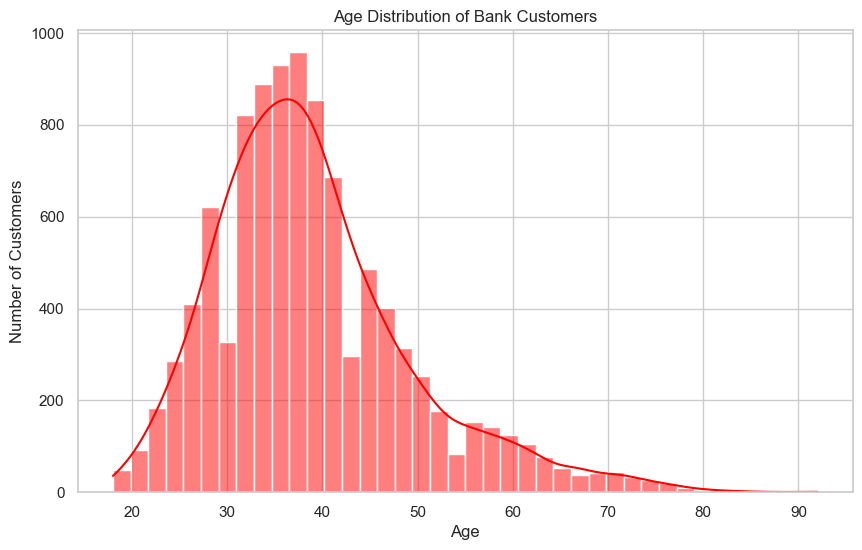

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Age'], bins=40, kde=True, color='red')  # adjust bins for granularity
plt.title('Age Distribution of Bank Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.savefig('Age Distribution of Customers', dpi = 300, bbox_inches = 'tight')
plt.show()

Result: The majority of the bank customers are between the ages of 30 - 40

2. What is the gender distribution of the bank customers?

In [25]:
# plt.figure(figsize=(10, 6))
# sns.countplot(data=merged_df, x='Gender', palette = 'pastel')
# plt.title('Gender distribution of Bank Customers')
# plt.xlabel('Gender')
# plt.ylabel('Number of Customers')
# plt.savefig('Gender Distribution of Customers', dpi = 300, bbox_inches = 'tight')
# plt.show()

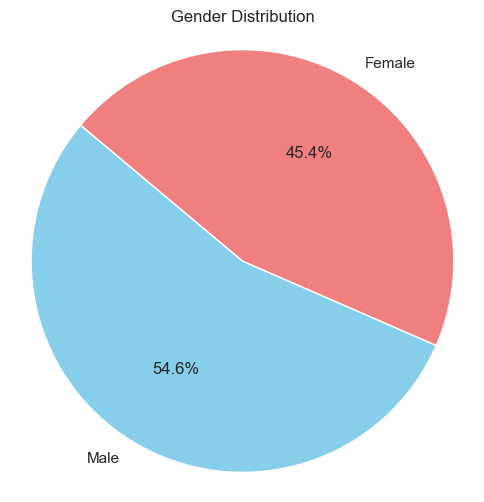

In [26]:
gender_counts = merged_df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.savefig('Gender Distribution', dpi = 300, bbox_inches = 'tight')
plt.show()

Result: The predominant gender among the bank customers are Males

3. Where are the customers coming from?

/var/folders/78/xvnhw2115jg_kxhl8ylzmtg80000gn/T/ipykernel_50054/1718527220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Geography', palette = 'pastel')


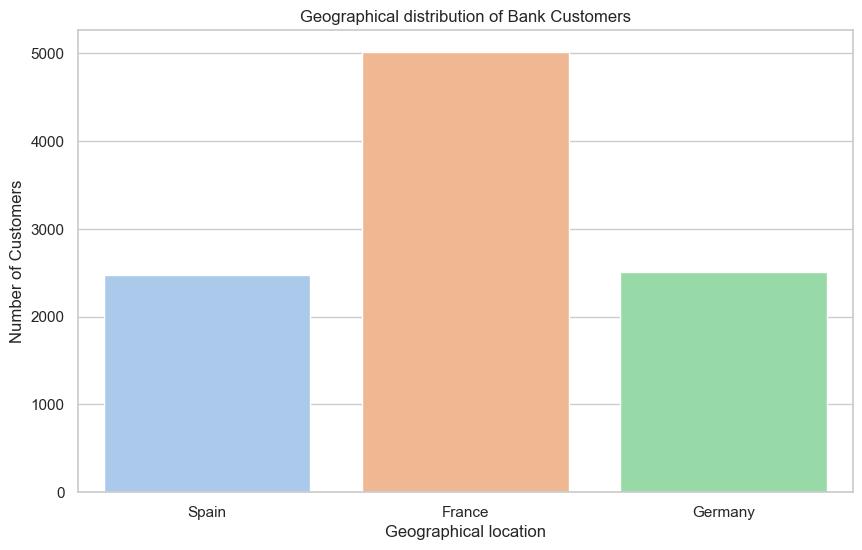

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Geography', palette = 'pastel')
plt.title('Geographical distribution of Bank Customers')
plt.xlabel('Geographical location')
plt.ylabel('Number of Customers')
plt.savefig('Geographical Distribution of Customers', dpi = 300, bbox_inches = 'tight')
plt.show()

Result: France has the largest customer base, followed by Spain and Germany

4. How many customers stayed and exited?

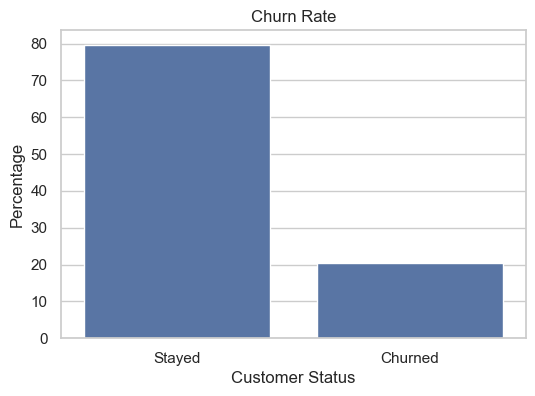

In [28]:
churn_rate = merged_df['Exited'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_rate.index, y=churn_rate.values)
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.title("Churn Rate")
plt.ylabel("Percentage")
plt.xlabel("Customer Status")
plt.savefig('Bank Churn Rate.png', dpi=300, bbox_inches='tight')
plt.show()

Result: About 20% of the bank's customers were lost.

5. What is the Churn rate by Age, gender, and Geography?

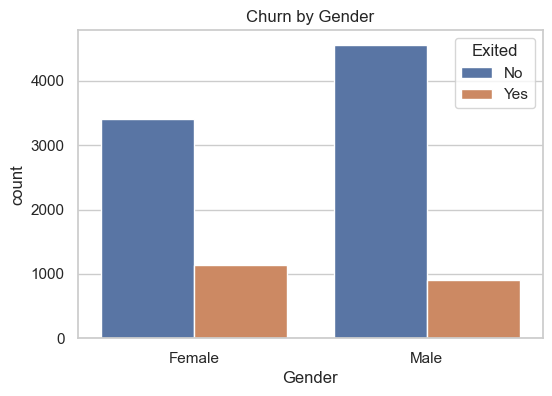

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='Gender', hue='Exited')
plt.title("Churn by Gender")
plt.xticks(rotation=0)
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.savefig('Churn by Gender.png', dpi=300, bbox_inches='tight')
plt.show()

Result: More female bank customers were seen to have a higher attrition.

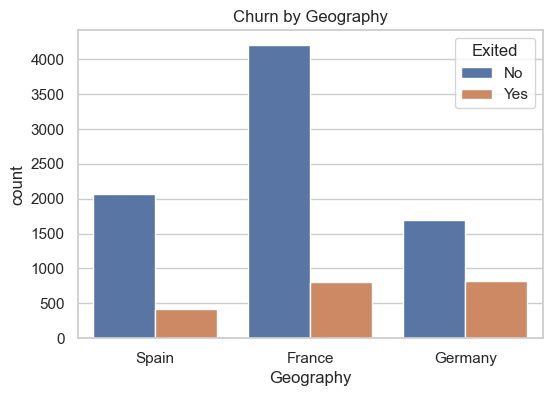

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='Geography', hue='Exited')
plt.title("Churn by Geography")
plt.xticks(rotation=0)
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.savefig('Churn by Geography.png', dpi=300, bbox_inches='tight')
plt.show()

Result: Customers based in Germany were observed to have a higher attrition rate than other regions.

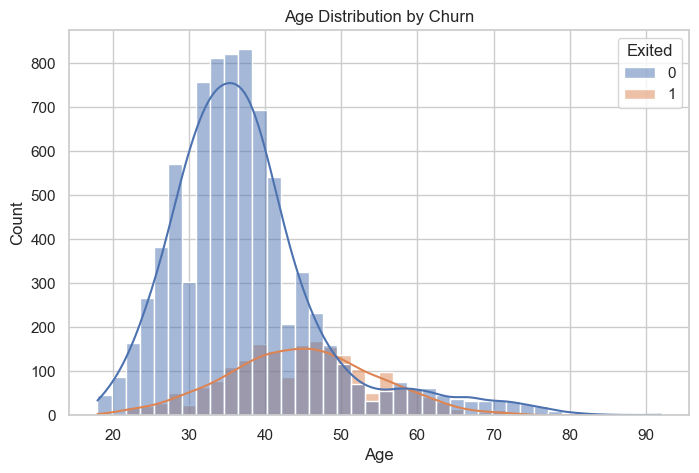

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(data=merged_df, x='Age', hue='Exited', kde=True, bins=40)
plt.title("Age Distribution by Churn")
plt.savefig('Age Distribution by Churn.png', dpi=300, bbox_inches='tight')
plt.show()

Result: A high attrition was observed among those aged above 45 years.


6. How long (years) do the bank customers stay before churning out?

/var/folders/78/xvnhw2115jg_kxhl8ylzmtg80000gn/T/ipykernel_50054/381840181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Tenure', data=merged_df, palette='Set2')


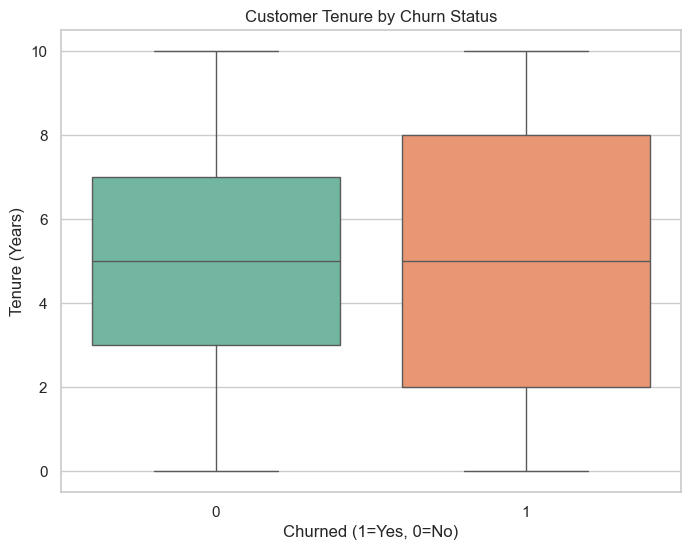

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Exited', y='Tenure', data=merged_df, palette='Set2')
plt.title('Customer Tenure by Churn Status')
plt.xlabel('Churned (1=Yes, 0=No)')
plt.ylabel('Tenure (Years)')
plt.savefig('Customer Tenure by Churn Status.png', dpi=300, bbox_inches='tight')
plt.show()

Result: Churned customers have a longer tenure (over 8 years) in the bank. Retention efforts should target older customers and provide incentives to this set of clients 

7. What is the Customers distribution by income group?

In [33]:
merged_df['EstimatedSalary'].describe()

count     10000.000000
mean      99762.195289
std       60583.863580
min     -999999.000000
25%       50910.677500
50%      100191.725000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [34]:
def categorize_income(salary):
    if salary < 50000:
        return 'Low'
    elif salary <= 100000:
        return 'Middle'
    else:
        return 'High'

merged_df['IncomeGroup'] = merged_df['EstimatedSalary'].apply(categorize_income)


/var/folders/78/xvnhw2115jg_kxhl8ylzmtg80000gn/T/ipykernel_50054/650619447.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IncomeGroup', data=merged_df, palette='pastel')


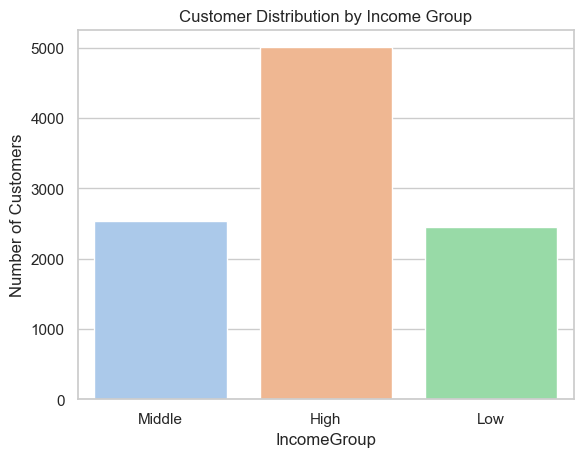

In [35]:
sns.countplot(x='IncomeGroup', data=merged_df, palette='pastel')
plt.title('Customer Distribution by Income Group')
plt.ylabel('Number of Customers')
plt.savefig('Customer Distribution by Income Group.png', dpi=300, bbox_inches='tight')
plt.show()

Result: From the analysis, most customers are categorized as having a high income. This suggests that the bank's customer base is mostly high-income, which can influence the design of credit products and account offerings.

8. What is the Churn rate by Income Group?

/var/folders/78/xvnhw2115jg_kxhl8ylzmtg80000gn/T/ipykernel_50054/3174754863.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IncomeGroup', y='Exited', data=merged_df, estimator='mean', palette='Set2')


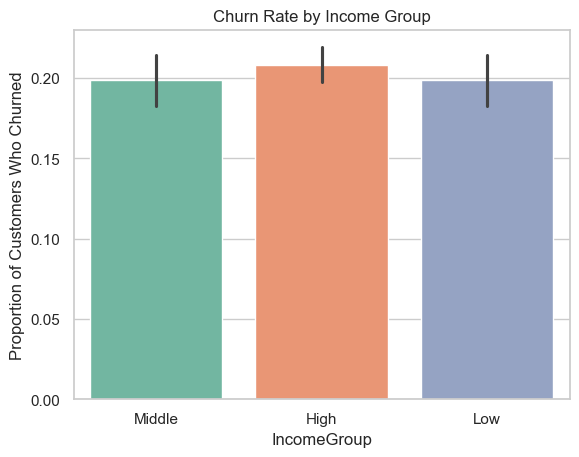

In [36]:
sns.barplot(x='IncomeGroup', y='Exited', data=merged_df, estimator='mean', palette='Set2')
plt.title('Churn Rate by Income Group')
plt.ylabel('Proportion of Customers Who Churned')
plt.savefig('Churn Rate by Income Group.png', dpi=300, bbox_inches='tight')
plt.show()

Result: The highest group churning more are those who earn highest in the bank. 

9. Customers distribution by account balances 

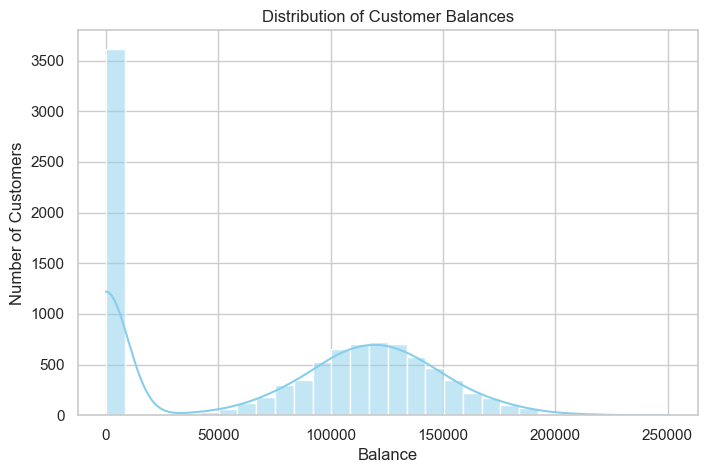

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['Balance'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Balances')
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.savefig('Distribution of Customer Balances.png', dpi=300, bbox_inches='tight')
plt.show()

10. What is the Churn rate for Credit card users and non-credit card users?

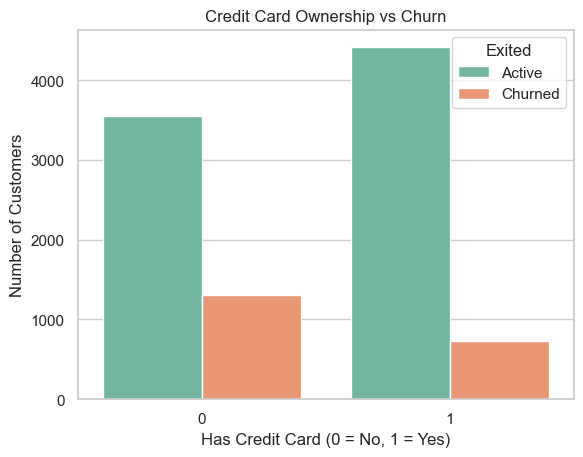

In [38]:
sns.countplot(x='HasCrCard', hue='Exited', data=merged_df, palette='Set2')
plt.title('Credit Card Ownership vs Churn')
plt.xlabel('Has Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['Active', 'Churned'])
plt.savefig('Churn Rate by Credit Card Ownership.png', dpi=300, bbox_inches='tight')
plt.show()

Result: Non-credit card holders churn more than those with credit cards. Banks may need to incentivize credit card usage

11. Active Membership vs Churn rate

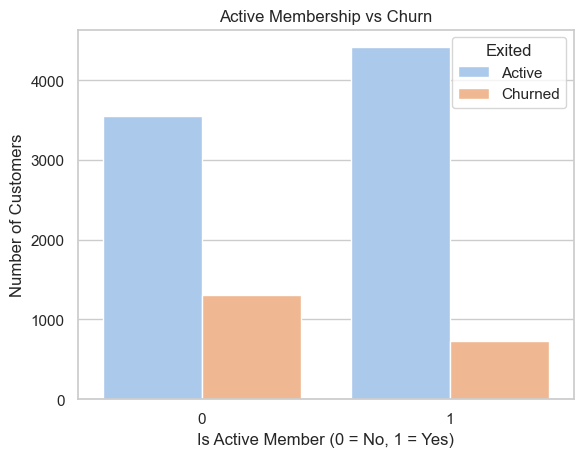

In [39]:
sns.countplot(x='IsActiveMember', hue='Exited', data=merged_df, palette='pastel')
plt.title('Active Membership vs Churn')
plt.xlabel('Is Active Member (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['Active', 'Churned'])
plt.savefig('Bank Churn by Active Membership.png', dpi=300, bbox_inches='tight')
plt.show()

Result: Inactive clients are more likely to churn which signals low engagement with the bank's customers. 

12. Correlation Insights

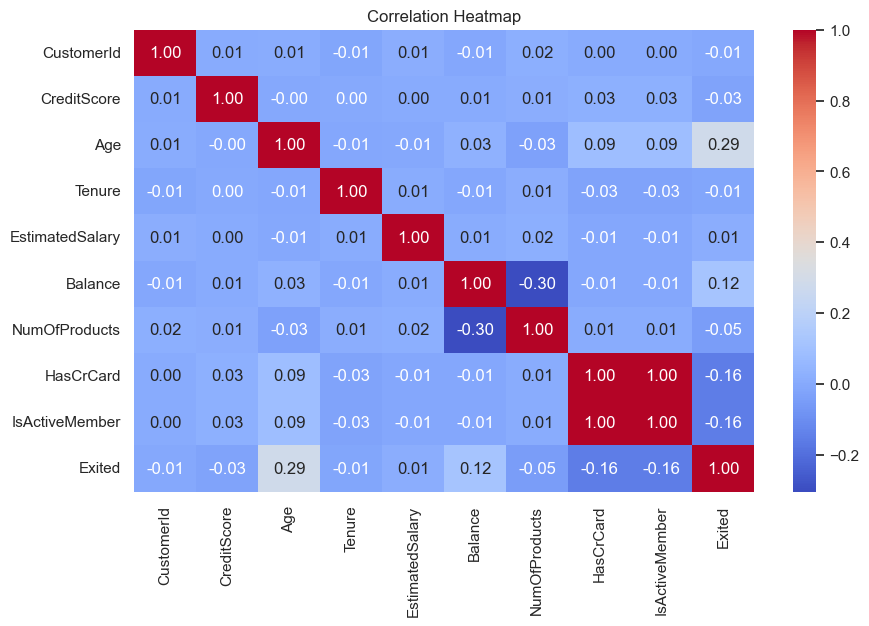

In [40]:
numeric_cols = merged_df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.savefig('correlation_heat_map.png', dpi=300, bbox_inches='tight')
plt.show()

Result: Tenure, balance and credit score shows weak correlation with churn individually

13. What is the churn rate by account balance?

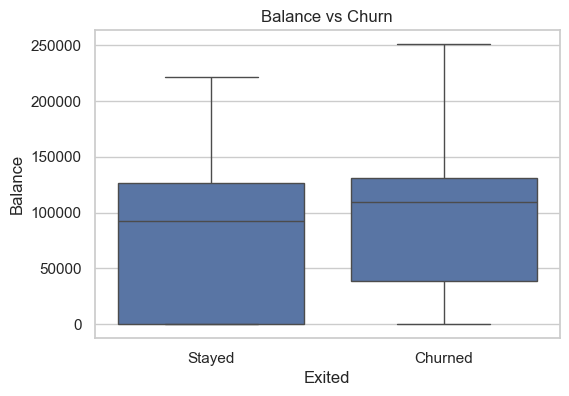

In [41]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=merged_df, x='Exited', y='Balance')
plt.title("Balance vs Churn")
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.savefig('Account Balance vs Churn.png', dpi=300, bbox_inches='tight')
plt.show()

Result: Churned customers tend to have higher average balances